## Observations and Insights
#### Add your analysis here
---
The data from the research of drug affects on tumors for mice has only a few that has a stable effect in tumor size such as "Capomulin", "Ramicane", "Infubinol" and "Ceftamin". This can be seen by the change in low SEM for each drug. With equal population of genders we look at Capomulin as it shows a promising result in average tumor volume. The Capumlin seemed to have a regressive effect as well as stabilization around 35 days. It also seems to have a high correlation between weight and Average Tumor Vol. indicating it may have a lasting effect on the subject.

In [347]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [68]:
# len(study_results.dropna(how='any')['Mouse ID'])
# print(len(study_results['Mouse ID']))
# len(study_results['Mouse ID'].unique())
# Combine the data into a single dataset
mouseResults = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
# Display the data table for preview
mouseResults.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [69]:
mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [70]:
# Check the number of mice.
len(mouseResults['Mouse ID'].unique())

249

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupBool = mouseResults.duplicated(subset = ['Mouse ID', 'Timepoint'])
dup_mice = mouseResults.loc[dupBool]['Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [75]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouseResults.loc[mouseResults['Mouse ID']==dup_mice[0]]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouseResults.loc[mouseResults['Mouse ID']==dup_mice[0]]
# duplicates.index
noDup = mouseResults.drop(duplicates.index)
noDup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Check the number of mice in the clean DataFrame.
len(noDup['Mouse ID'].unique())

248

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_frame= { 
    'Mean Tumor Volume' : noDup.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume' : noDup.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance' : noDup.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum(),
    'Tumor Volume Std. Dev.' : noDup.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
    'Tumor Volumne SEM' : noDup.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()}

DR_df = pd.DataFrame(df_frame)
# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
DR_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volumne SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,9355.420462,4.994774,0.329346
Ceftamin,52.591172,51.776157,9361.228582,6.268188,0.469821
Infubinol,52.884795,51.820584,9413.493529,6.567243,0.492236
Ketapril,55.235638,53.698743,10384.299876,8.279709,0.603860
Naftisol,54.331565,52.509285,10105.671026,8.134708,0.596466
Placebo,54.033581,52.288934,9780.078122,7.821003,0.581331
Propriva,52.320930,50.446266,7743.497619,6.622085,0.544332
Ramicane,40.216745,40.673236,9169.417875,4.846308,0.320955
Stelasyn,54.233149,52.431737,9816.199991,7.710419,0.573111


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_gp = noDup.groupby('Drug Regimen')
drug_df = drug_gp.agg({'Tumor Volume (mm3)':['mean','median','sum','std','sem']})
drug_df = drug_df.rename(columns = {'mean':'Mean Tumor Volume', 'median':'Median Tumor Volume',
                        'sum': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.',
                        'sem': 'Tumor Volumne SEM'})
# Use method to produce everything with a single groupby function
drug_df

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809           9355.420462   
Ceftamin              52.591172           51.776157           9361.228582   
Infubinol             52.884795           51.820584           9413.493529   
Ketapril              55.235638           53.698743          10384.299876   
Naftisol              54.331565           52.509285          10105.671026   
Placebo               54.033581           52.288934           9780.078122   
Propriva              52.320930           50.446266           7743.497619   
Ramicane              40.216745           40.673236           9169.417875   
Stelasyn              54.233149           52.431737           9816.199991   
Zoniferol             53.236507           51.818479           9689.044192   

                                                       
             Tumor Volume Std. Dev. Tumor Volumne SEM  
Drug Regimen                                           
Capomulin                  4.994774          0.329346  
Ceftamin                   6.268188          0.469821  
Infubinol                  6.567243          0.492236  
Ketapril                   8.279709          0.603860  
Naftisol                   8.134708          0.596466  
Placebo                    7.821003          0.581331  
Propriva                   6.622085          0.544332  
Ramicane                   4.846308          0.320955  
Stelasyn                   7.710419          0.573111  
Zoniferol                  6.966589          0.516398

## Bar and Pie Charts

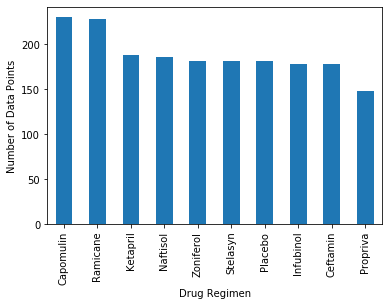

In [132]:
totalTreatment = noDup.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending = False).plot(kind = 'bar')
totalTreatment.set_ylabel("Number of Data Points")
plt.show()

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

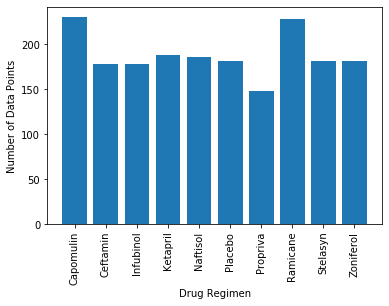

In [140]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
tickLoc = range(len(DR_df['Mean Tumor Volume']))
plt.bar(tickLoc,noDup.groupby('Drug Regimen')['Mouse ID'].count())
plt.xticks(tickLoc, DR_df['Mean Tumor Volume'].index, rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

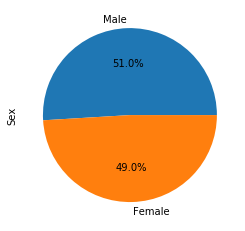

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# lbls = round(noDup['Sex'].value_counts()/len(noDup['Sex'])*100)
genderPlt = noDup['Sex'].value_counts().plot(kind='pie', autopct="%1.1f%%")

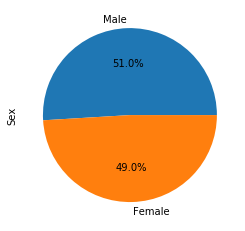

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(noDup['Sex'].value_counts(), labels = noDup['Sex'].unique(), autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [216]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
finalVol= noDup.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finVol_df = pd.merge(finalVol, study_results, on = ['Mouse ID', 'Timepoint'], how = 'left')
finVol_df = pd.merge(finVol_df, mouse_metadata, on = ['Mouse ID'] )
finVol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [379]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    tumor_vol_list.append(finVol_df.loc[finVol_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'])
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset to tumor volume data list
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_list[-1].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s potential outliers: \
          {finVol_df.loc[(finVol_df['Tumor Volume (mm3)']<lower_bound) | (finVol_df['Tumor Volume (mm3)']>upper_bound) & (finVol_df['Drug Regimen']== drug)]['Tumor Volume (mm3)']}")

Capomulin's potential outliers:           Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:           Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:           12     32.978522
31     36.321346
37     33.397653
61     30.485985
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
121    28.430964
124    33.329098
126    31.095335
158    36.561652
163    32.377357
174    23.343598
177    30.276232
183    34.455298
192    31.023923
220    36.041047
226    28.484033
239    31.896238
244    30.638696
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:           96     22.050126
174    23.343598
Name: Tumor Volume (mm3), dtype: float64


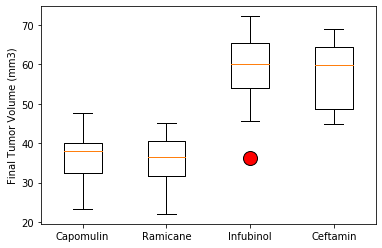

In [245]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=({'markerfacecolor' : 'r', 'markersize' : '14'}))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

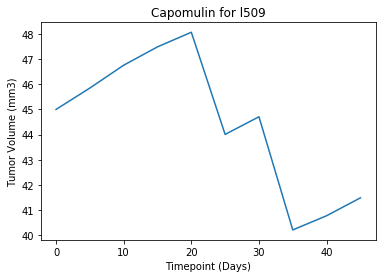

In [270]:
random_mouse = np.random.choice(noDup.loc[noDup['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique())
rand_treat = noDup.loc[noDup['Mouse ID'] == random_mouse][['Tumor Volume (mm3)','Timepoint']]
plt.plot(rand_treat['Timepoint'], rand_treat['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin for {random_mouse}')
plt.show()

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


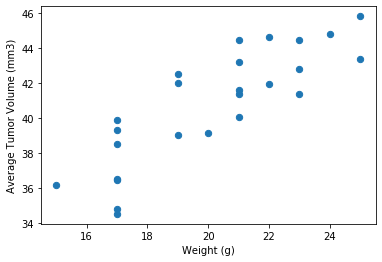

In [351]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capum_df = noDup.loc[noDup['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()
scaplt = capum_df.plot(kind = 'scatter',x = 'Weight (g)', y = 'Tumor Volume (mm3)',s = 40)
scaplt.set_ylabel( 'Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


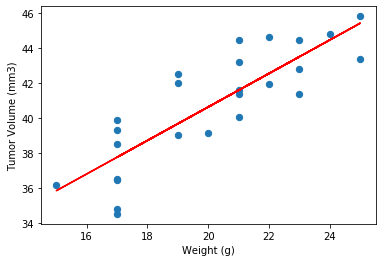

In [356]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
xval = capum_df['Weight (g)']
yval = capum_df['Tumor Volume (mm3)']
corr = st.pearsonr(xval, yval)
print(f'The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}')
slope, intercept, rvalue, pvalue, stderr = linregress(xval,yval)
regress_values = xval * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
scaplt = capum_df.plot(kind = 'scatter',x = 'Weight (g)', y = 'Tumor Volume (mm3)',s = 40)
scaplt.plot(xval,regress_values,"r-")
# scaplt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.show()